In [1]:
import os
from os.path import expanduser
import socket
import sys
import glob

# BELOW IS SYSTEM/PATH CONFIGURATION #
my_home = expanduser("~")
running_system = socket.gethostname()
# Configure machine's names here #
systemHLRN = 'blogin1'
systemLOCAL = 'Laurents-MacBook-Pro.local'
my_home = expanduser("~")
# Define local pass #
if running_system == systemLOCAL:
    print "computer = ", running_system
    wd_path = os.path.join(my_home,"Documents","projects", "pyfesom")
elif running_system[0:1] == "b" or running_system == systemHLRN:
    print "computer = ", running_system
    wd_path = os.path.join(my_home,"pyfesom")
else:
    print 'please configure your local machine : type socket.gethostname()'
print "working directory set to", wd_path
os.chdir(wd_path)
sys.path.append("codes/modules") # add custom Vibe 's modules
#sys.path.append("pyfesom") # add standard 's modules
#########################################

computer =  blogin1
working directory set to /home/hbkoziel/pyfesom


In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from pylab import *
import pyfesom as pf
#from load_mesh_data_new import *
import numpy as np
import datetime as dt
from PiecewiseNorm import PiecewiseNorm
from netCDF4 import Dataset
import cmocean as cmaps
#from matplotlib.colors import ListedColormap

In [3]:
# PLOT CONFIGURATION #

# load colormaps #
cmap = cmaps.cm.balance
# figure export 
export_plot = True
# figure export definition
dpicnt=150
# choose simulation
runid='Arc12'
# choose date
first_year = 1980
last_year  = 2015
years      = np.arange(first_year,last_year+1,1)
months =np.linspace(0,11,12).astype(int)
print years
print months
# choose depth
get3d = True
# load the given biological tracer #
var_id= 'tr01' #DIN
#var_id= 'tr18' #DSI
########################

# AUTOMATIC DEFINITION OF PATHS
resultpath = '/scratch/usr/hbkvsk12/hlrn3_work2/results/'+runid+'/Oldfiles/'
savepath    = wd_path+'/figures/'+runid+'/'
meshpath    = '/home/hbkoziel/awi-models/data/mesh/meshArc4.5'
outputpath = '/scratch/usr/hbkoziel/Arc12/pybins/'

# Create figure directory if it does not exist
if os.path.exists(savepath) == False:
    try:
        os.mkdir(savepath)
        print ("Creation of the directory %s successfull" % savepath)
    except OSError:
        print ("Creation of the directory %s failed" % savepath)
else:
    print ("directory %s already existing" % savepath)

[1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994
 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015]
[ 0  1  2  3  4  5  6  7  8  9 10 11]
directory /home/hbkoziel/pyfesom/figures/Arc12/ already existing


In [4]:
mesh = pf.load_mesh(meshpath, usepickle=True,get3d=get3d)

/home/hbkoziel/awi-models/data/mesh/meshArc4.5/pickle_mesh
2
The usepickle == True)
The pickle file for python 2 exists.
The mesh will be loaded from /home/hbkoziel/awi-models/data/mesh/meshArc4.5/pickle_mesh


In [5]:
DATA = np.empty((80, 21))
#DATA[:]=np.nan
#DATA = []
lon_start = 20
lat_start = 69.5
lon_end   = 20
lat_end   = 75
npoints = 80
lonlat = pf.transect_get_lonlat(lon_start, lat_start, lon_end, lat_end, npoints=npoints)
dist   = pf.transect_get_distance(lonlat) # get's distances between starting point and present point
nodes  = pf.transect_get_nodes(lonlat, mesh)
dist   = pf.transect_get_distance(lonlat)
profile = pf.transect_get_profile(nodes, mesh)
        
for year in years:
    print year
    ncfile = resultpath+runid+'.'+str(year)+'.oce.mean.nc'
    f      = Dataset(ncfile, 'r')
    for mo in months:

        if mo ==0: 
            dayind = (range(0,15))
            month='JAN'
        if mo ==1: 
            dayind = (range(15,30))
            month='FEV'
        if mo ==2: 
            dayind = (range(30,45))
            month='MAR'
        if mo ==3: 
            dayind = (range(45,60))
            month='APR'
        elif mo ==4: 
            dayind = (range(60,75))
            month='MAY'
        elif mo ==5: 
            dayind = (range(75,90))
            month='JUN'
        elif mo ==6: 
            dayind = (range(90,105))
            month='JUL'
        elif mo ==7:
            dayind = (range(105,120))
            month='AUG'
        elif mo ==8: 
            dayind = (range(120,135))
            month='SEP'
        elif mo ==9: 
            dayind = (range(135,150))
            month='OCT'
        elif mo ==10: 
            dayind = (range(150,165))
            month='NOV'
        elif mo ==11: 
            dayind = (range(165,167))
            month='DEC'
        print month
        print 'loading variable from netcdf file...'
        if year<2000:
            data    = f.variables[var_id][mo,:]
        else:
            data    = f.variables[var_id][dayind,:].mean(axis=0)
        
        print 'loading section data...'
        
        section = pf.transect_get_data(data, profile)
        print 'concatenation...'
        #DATA[i,:,:] = DATA[i,:,:] + section[:,0:21]
        #DATA = np.append(DATA, section[:,0:21], axis=2)
        #DATA.append(section[:,0:21])
        DATA = np.dstack([DATA,section[:,:21]])

1980
JAN
loading variable from netcdf file...
loading section data...
concatenation...
FEV
loading variable from netcdf file...
loading section data...
concatenation...
MAR
loading variable from netcdf file...
loading section data...
concatenation...
APR
loading variable from netcdf file...
loading section data...
concatenation...
MAY
loading variable from netcdf file...
loading section data...
concatenation...
JUN
loading variable from netcdf file...
loading section data...
concatenation...
JUL
loading variable from netcdf file...
loading section data...
concatenation...
AUG
loading variable from netcdf file...
loading section data...
concatenation...
SEP
loading variable from netcdf file...
loading section data...
concatenation...
OCT
loading variable from netcdf file...
loading section data...
concatenation...
NOV
loading variable from netcdf file...
loading section data...
concatenation...
DEC
loading variable from netcdf file...
loading section data...
concatenation...
1981
JAN
lo

loading section data...
concatenation...
MAY
loading variable from netcdf file...
loading section data...
concatenation...
JUN
loading variable from netcdf file...
loading section data...
concatenation...
JUL
loading variable from netcdf file...
loading section data...
concatenation...
AUG
loading variable from netcdf file...
loading section data...
concatenation...
SEP
loading variable from netcdf file...
loading section data...
concatenation...
OCT
loading variable from netcdf file...
loading section data...
concatenation...
NOV
loading variable from netcdf file...
loading section data...
concatenation...
DEC
loading variable from netcdf file...
loading section data...
concatenation...
1989
JAN
loading variable from netcdf file...
loading section data...
concatenation...
FEV
loading variable from netcdf file...
loading section data...
concatenation...
MAR
loading variable from netcdf file...
loading section data...
concatenation...
APR
loading variable from netcdf file...
loading sec

loading section data...
concatenation...
SEP
loading variable from netcdf file...
loading section data...
concatenation...
OCT
loading variable from netcdf file...
loading section data...
concatenation...
NOV
loading variable from netcdf file...
loading section data...
concatenation...
DEC
loading variable from netcdf file...
loading section data...
concatenation...
1997
JAN
loading variable from netcdf file...
loading section data...
concatenation...
FEV
loading variable from netcdf file...
loading section data...
concatenation...
MAR
loading variable from netcdf file...
loading section data...
concatenation...
APR
loading variable from netcdf file...
loading section data...
concatenation...
MAY
loading variable from netcdf file...
loading section data...
concatenation...
JUN
loading variable from netcdf file...
loading section data...
concatenation...
JUL
loading variable from netcdf file...
loading section data...
concatenation...
AUG
loading variable from netcdf file...
loading sec

loading section data...
concatenation...
2005
JAN
loading variable from netcdf file...
loading section data...
concatenation...
FEV
loading variable from netcdf file...
loading section data...
concatenation...
MAR
loading variable from netcdf file...
loading section data...
concatenation...
APR
loading variable from netcdf file...
loading section data...
concatenation...
MAY
loading variable from netcdf file...
loading section data...
concatenation...
JUN
loading variable from netcdf file...
loading section data...
concatenation...
JUL
loading variable from netcdf file...
loading section data...
concatenation...
AUG
loading variable from netcdf file...
loading section data...
concatenation...
SEP
loading variable from netcdf file...
loading section data...
concatenation...
OCT
loading variable from netcdf file...
loading section data...
concatenation...
NOV
loading variable from netcdf file...
loading section data...
concatenation...
DEC
loading variable from netcdf file...
loading sec

loading section data...
concatenation...
MAY
loading variable from netcdf file...
loading section data...
concatenation...
JUN
loading variable from netcdf file...
loading section data...
concatenation...
JUL
loading variable from netcdf file...
loading section data...
concatenation...
AUG
loading variable from netcdf file...
loading section data...
concatenation...
SEP
loading variable from netcdf file...
loading section data...
concatenation...
OCT
loading variable from netcdf file...
loading section data...
concatenation...
NOV
loading variable from netcdf file...
loading section data...
concatenation...
DEC
loading variable from netcdf file...
loading section data...
concatenation...
2014
JAN
loading variable from netcdf file...
loading section data...
concatenation...
FEV
loading variable from netcdf file...
loading section data...
concatenation...
MAR
loading variable from netcdf file...
loading section data...
concatenation...
APR
loading variable from netcdf file...
loading sec

In [6]:
print DATA.shape
print section.shape
depth = mesh.zlevs[0:21]
print depth.shape
print lonlat.shape

(80, 21, 433)
(80, 47)
(21,)
(80, 2)


In [7]:
DATA[DATA>33]=np.nan

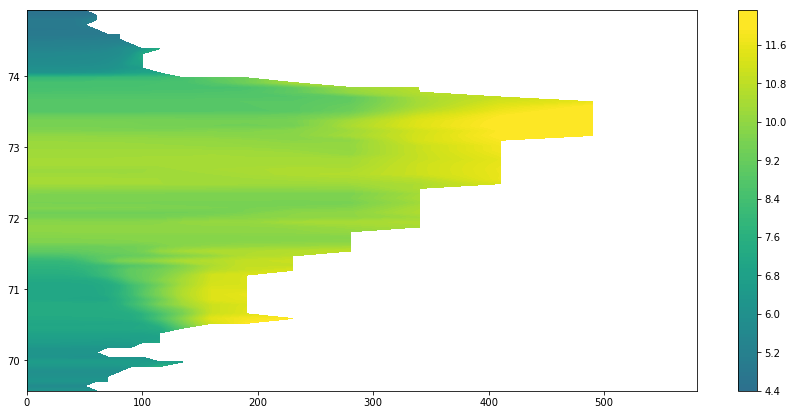

In [8]:
fig, ax = plt.subplots(1,1, figsize=(15,7))
p = ax.contourf(depth,lonlat[:,1],DATA[:,:,1],100,vmin=0,vmax=12)
fig.colorbar(p, ax=ax)

In [9]:
DATA2 = DATA[:,:,1:]

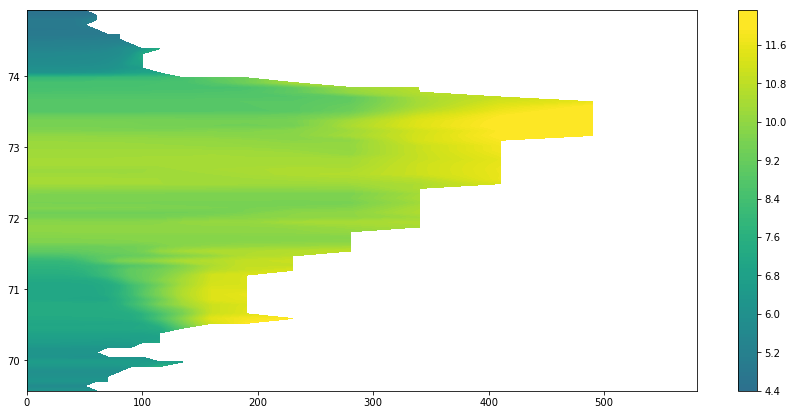

In [10]:
fig, ax = plt.subplots(1,1, figsize=(15,7))
p = ax.contourf(depth,lonlat[:,1],DATA2[:,:,0],100,vmin=0,vmax=12)
fig.colorbar(p, ax=ax)

In [11]:
outfile = outputpath+'BSO_DIN.npy'
np.save(outfile, DATA2.data, allow_pickle=True, fix_imports=True)

In [12]:
outfile = outputpath+'BSOdepth.npy'
np.save(outfile, depth, allow_pickle=True, fix_imports=True)

In [13]:
outfile = outputpath+'BSOlonlat.npy'
np.save(outfile, lonlat, allow_pickle=True, fix_imports=True)